### Import Packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

### Import Data

In [2]:
npids = 50
data = pd.read_csv('nlst_subsets.csv')[:npids]

In [11]:
data.where(data['can_scr']>0)

,elig,race,smokeage,smokeday,age_quit,cigsmok,gender,rndgroup,age,pkyr,...,ageemph,agefibr,agehear,agepneu,agesarc,agesili,agetube,agehype,agestro,scr_group
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2.0,1.0,22.0,20.0,NaN,1.0,2.0,1.0,61.0,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Set parameters

In [3]:
age    = data['age']
cancer = data['can_scr'].where(data['can_scr']<=0,2)-1

### Define axis

In [4]:
x = np.arange(age.max())
y = np.arange(len(data))
tags = ['smoke', 'tmp']
z = np.arange(len(tags))

### Smoke data

In [5]:
start_smoke = data['smokeage'].fillna(0).astype(int)
quit_smoke  = data['age_quit'].fillna(age).astype(int)
mag_smoke   = data['smokeday']/data['smokeday'].max()

smoke = np.zeros((len(y), len(x)))
for pid in range(len(data)):
    smoke[pid, start_smoke[pid]:quit_smoke[pid]+1] = mag_smoke[pid]*cancer[pid]
    smoke[pid, age[pid]+1:] = np.nan

### Tmp data

In [6]:
start_tmp = data['smokeage'].fillna(0).astype(int)
quit_tmp  = data['age_quit'].fillna(age).astype(int)
mag_tmp   = data['smokeday']/data['smokeday'].max()

tmp = np.zeros((len(y), len(x)))
for pid in range(len(data)):
    tmp[pid, start_tmp[pid]:quit_tmp[pid]+1] = mag_tmp[pid]*cancer[pid]
    tmp[pid, age[pid]+1:] = np.nan

### Stack

In [7]:
everything = np.stack((smoke,tmp),2)

### 2D plot

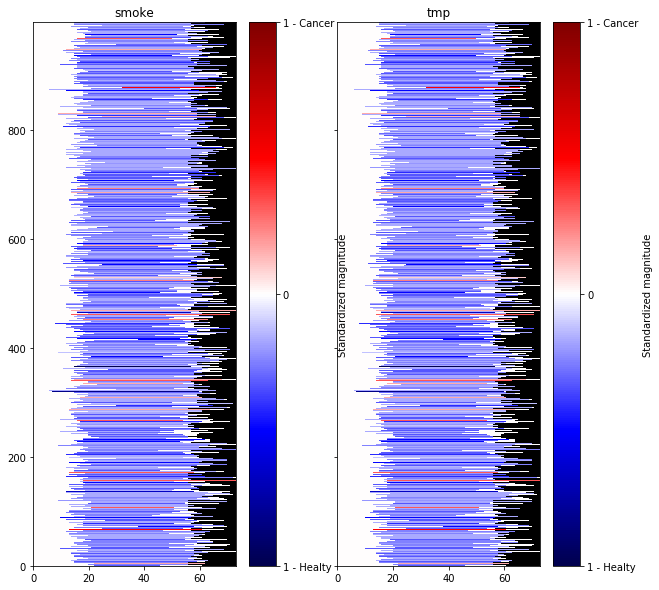

In [8]:
cmap = cm.seismic
cmap.set_bad('k',1.)
fig, axes = plt.subplots(1,len(z), sharey=True, figsize=(10,10))
for i, (ax, tag) in enumerate(zip(axes, tags)):
    pcol = ax.pcolormesh(x, y, everything[:,:,i], 
                        cmap=cmap, vmin=-1, vmax=1)
    cbar = plt.colorbar(pcol, ax=ax, ticks=[-1, 0, 1], label='Standardized magnitude')
    cbar.ax.set_yticklabels(['1 - Healty', '0', '1 - Cancer'])
    ax.set_title(tag)

### 3D plot

<IPython.core.display.Javascript object>


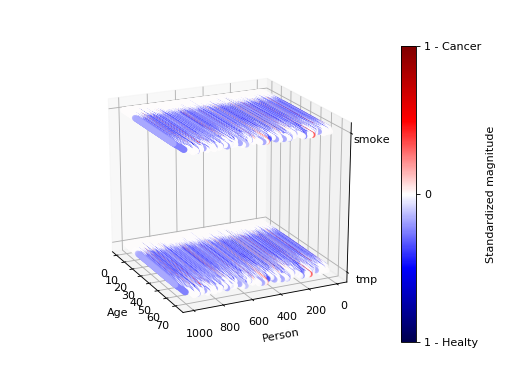

In [9]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make the 3D grid
X, Y, Z = np.meshgrid(x, y, z)


cube = ax.scatter(X, Y, Z, zdir='z', c=np.ravel(everything), cmap=cmap, vmin=-1, vmax=1)
cbar = fig.colorbar(cube, ticks=[-1, 0, 1], label='Standardized magnitude') # Add a color bar
cbar.ax.set_yticklabels(['1 - Healty', '0', '1 - Cancer'])
ax.set_xlabel('Age')
ax.set_ylabel('Person')
ax.set_zticks(z)
ax.set_zticklabels(tags)
plt.show()